In [ ]:
!pip install -q geopandas
!pip install -q rasterstats
!pip install -q rasterio

In [ ]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
import rasterio as rio
from rasterstats import zonal_stats

In [ ]:
# Lendo imagem como array
src = rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif')
transform = src.transform
list_band = [src.read(i+1) for i in range(src.count)]

img = np.dstack(list_band)

In [ ]:
# Calculando NDVI
ndvi = (img[:,:,3] - img[:,:,2]) / (img[:,:,3] + img[:,:,2])

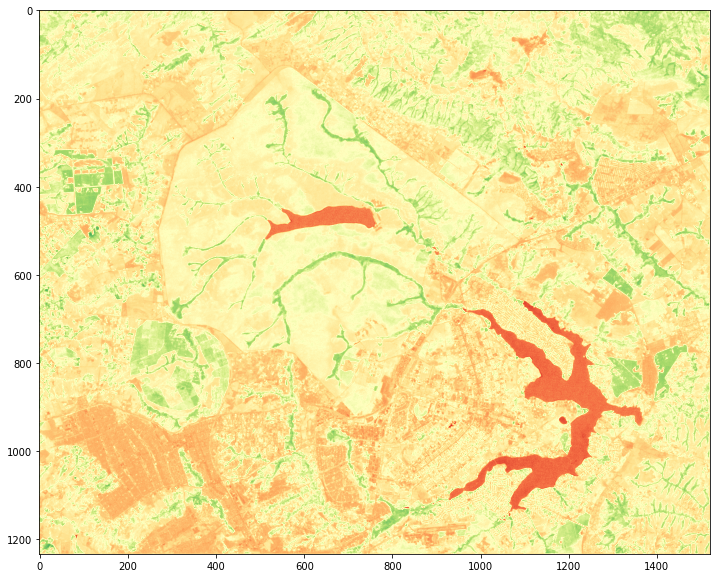

In [ ]:
# Visualizando NDVI
plt.figure(figsize=(15,10))
plt.imshow(ndvi, cmap='RdYlGn')

In [ ]:
# Calculando estatísticas
zonal= zonal_stats('/content/drive/MyDrive/Curso PDI com Python/ROI.shp', 
                           ndvi, affine = transform, 
                           stats="count min mean max median std")
df = pd.DataFrame.from_dict(zonal)
df.head()

,min,max,mean,count,std,median
0,-0.333333,-0.210526,-0.252287,51,0.024875,-0.243243
1,-0.297297,-0.176471,-0.252409,43,0.023724,-0.243243
2,-0.147929,-0.051282,-0.099692,60,0.019130,-0.099090
3,-0.123457,0.013699,-0.069800,57,0.037232,-0.080000
4,0.266667,0.508475,0.429014,123,0.036907,0.431373
